<a href="https://colab.research.google.com/github/Dharmin-Shah/Deep-Learning-Recurrent-Neural-Networks/blob/main/Frozen_Desert_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>The Frozen Desert Forecast </h1>
In this project we will be using the historical data of production of frozen desert to learn the patterns and forecast the production of the future.

In [40]:
# Regular imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Fethching and processing the data<h2>

In [41]:
# Reading the csv from the source
# Parsing the dates and converting them to indexes
df = pd.read_csv('https://raw.githubusercontent.com/Dharmin-Shah/Deep-Learning-Recurrent-Neural-Networks/main/Frozen_Dessert_Production.csv',
                 parse_dates=True,index_col='DATE')

In [42]:
#Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [43]:
#Changing the name of the column for better understanding
df.columns = ['Production']

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Production  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [45]:
df.head()

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [46]:
df.tail()

,Production
DATE,
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632
2019-08-01,102.6085
2019-09-01,101.5866


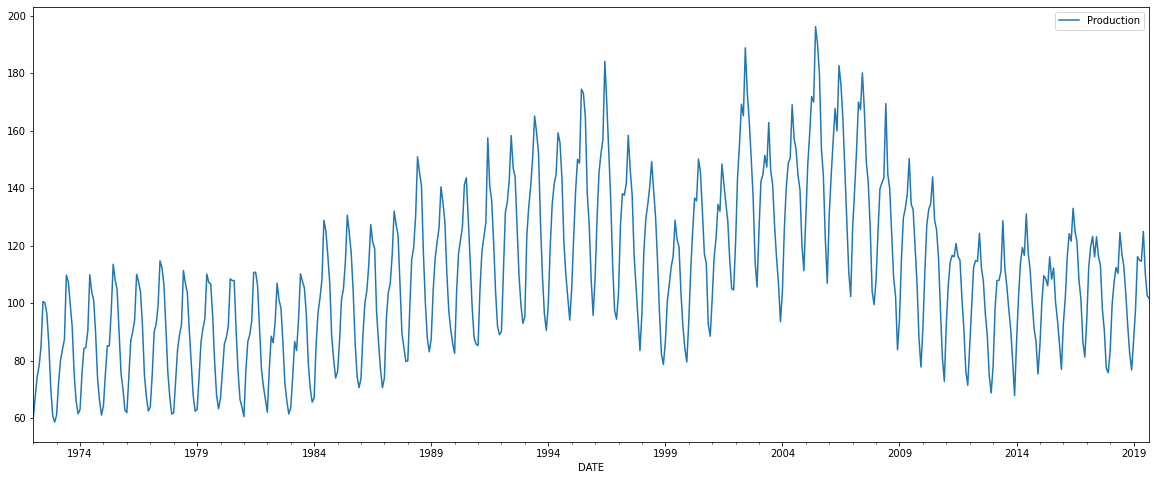

In [47]:
#Visualizing the data
df.plot(figsize=(20,8))

<h2> Train, Test Split </h2>

In [48]:
#Checking the length of the data
len(df)

573

In [49]:
#Deciding the test size (24 months in our case)
test_size = 24

#Identifying the indexes for test data
test_ind = len(df) - test_size

In [50]:
#Spliting the data
train = df[:test_ind]
test = df[test_ind:]

In [51]:
train

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2017-05-01,116.0635
2017-06-01,123.0870
2017-07-01,116.2639


In [52]:
test

,Production
DATE,
2017-10-01,90.4732
2017-11-01,77.4378
2017-12-01,75.8118
2018-01-01,83.4343
2018-02-01,99.4899
2018-03-01,107.3152
2018-04-01,112.4309
2018-05-01,110.3544
2018-06-01,124.5841


<h2> Scaling the data</h2>

In [53]:
#Importing MinMaxScaler to scale the features
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()

In [55]:
# Computig the parameters for transforming
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [56]:
#Transforming train and test data
scaled_train = scaler.transform(train)

In [57]:
scaled_test = scaler.transform(test)

<h2> Time Series Generator </h2>

In [58]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [59]:
#Length will help in generating the data in a way that the model looks at 18 months data at a time to predict
length = 18
# Features = 1 since only one column of data is present
n_features = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

<h2> Model Creation </h2>

In [60]:
#Importing LSTM and Dense Layer for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [61]:
model = Sequential()

# LSTM layer with 100 nodes
model.add(LSTM(100,'relu',input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')


In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


<h2> Validation Generator and Early Stopping </h2>

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
early_stopping = EarlyStopping(monitor='val_loss',patience=2)

In [65]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

<h2>Training</h2>

In [66]:
model.fit(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stopping])

Epoch 1/20
531/531 [==============================] - 5s 7ms/step - loss: 0.0394 - val_loss: 0.0032
Epoch 2/20
531/531 [==============================] - 3s 7ms/step - loss: 0.0099 - val_loss: 0.0045
Epoch 3/20
531/531 [==============================] - 4s 7ms/step - loss: 0.0045 - val_loss: 0.0014
Epoch 4/20
531/531 [==============================] - 4s 7ms/step - loss: 0.0038 - val_loss: 0.0026
Epoch 5/20
531/531 [==============================] - 4s 7ms/step - loss: 0.0033 - val_loss: 0.0042


<h3> Loss Visualization </h3>

In [67]:
loss = pd.DataFrame(model.history.history)

In [68]:
loss.columns = ['Loss','Validation_Loss']

In [69]:
loss

,Loss,Validation_Loss
0,0.026466,0.003181
1,0.008870,0.004544
2,0.004630,0.001381
3,0.003818,0.002564
4,0.003312,0.004186


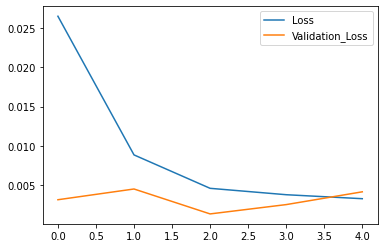

In [70]:
loss.plot()

<h2>Evaluting the Model </h2>

In [76]:
#To evaluate, we use a loop to iterate and generate the next prediction

test_predictions = []

# The first batch that needs to be evaluated will be last 18 months of train set to predict the 19th month forecast
first_eval_batch = scaled_train[-length:]

#Reshape to pass to the model (batch_size,length,n_features)
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  #Predict the 19th month value
  current_pred = model.predict(current_batch)[0]

  #Add it to the test_predictions to compare later
  test_predictions.append(current_pred)

  #Create the new current batch excluding the first month value in the current batch and adding the predicted 19th month value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [77]:
# To obtain actual values, we need to reverse the transform
true_predictions = scaler.inverse_transform(test_predictions)

In [78]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
test

,Production,Predictions
DATE,,
2017-10-01,90.4732,97.147103
2017-11-01,77.4378,92.335444
2017-12-01,75.8118,92.052203
2018-01-01,83.4343,101.776947
2018-02-01,99.4899,113.321790
2018-03-01,107.3152,122.943590
2018-04-01,112.4309,129.755227
2018-05-01,110.3544,133.095131
2018-06-01,124.5841,132.301779


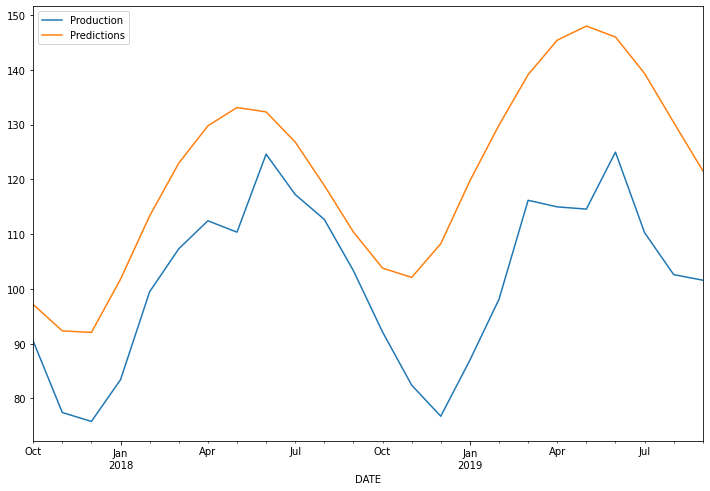

In [80]:
test.plot(figsize=(12,8))

<h3> We can observe that the predictions follow the same pattern as the test data. As we are predicting future values based on previously predicted values, the increase in noise will start to affect the results. </h3>